> ### **다음 분기에 어떤 게임을 설계해야 할까**

---
*   Sprint 1 : EDA, Feature Engineering, Data manipulation, Data Visualization
*   Sprint 2 : Hypothesis Test, Confidence Interval, Bayesian
*   Sprint 3 : Dimension Reduction, PCA, Cluster
---

1. 지역에 따라서 선호하는 게임 장르가 다를까?
2. 연도별 게임의 트렌드가 있을까?
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

> +++ 개인 분석 목표

---

* 내가 생각하는 문제 제시:
* 문제에 대한 가설
* 문제에 대해 사용한 데이터셋에 대한 설명
* 작업 결과
* 결론

어떤 모델을 어떤 코드로 짰는지 X
문제 제시 및 그 문제를 해결하기 위해 사용한 방법과 결과 위주



> Information of the data

* Name:        name of the game 
* Platform:    platform of the game
* Year: (int)  published year of the game
* Genre:       genre of the game
* Publisher:   company where published the game
* NA_Sales: (float) NA sales in MM
* EU_Sales: (float) EU sales in MM
* JP_Sales: (float) Jap sales in MM
* Other_Sales: (float) Sales in other coutries in MM

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [4]:
## 데이터셋 불러오기
df = pd.read_csv('/content/drive/MyDrive/Codestates/vgames2.csv')

## 데이터 인포 체크
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [5]:
## Drop Unnamed column 
df = df.drop("Unnamed: 0", axis=1)

## Null 값 제거
df = df.dropna()
print(df.isnull().values.any())

False


In [6]:
## 연도 dtype float -> int화
df.Year = df.Year.astype(int)

df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [7]:
print(df.Platform.unique())
print(df.Year.unique())
print(df.Genre.unique())

['DS' 'Wii' 'PSP' 'PS3' 'PC' 'PS' 'GBA' 'PS4' 'PS2' 'XB' 'X360' 'GC' '3DS'
 '2600' 'SAT' 'GB' 'NES' 'DC' 'N64' 'XOne' 'SNES' 'WiiU' 'PSV' 'GEN' 'SCD'
 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
[2008 2009 2010 2005 2011 2007 2001 2003 2006 2014 2015 2002 1997 2013
 1996 2004 2000 1984 1998 2016 1985 1999    9   97 1995 1993 2012 1987
 1982   11 1994 1990   15 1992 1991 1983 1988 1981    3 1989   96    6
    8 1986    1    5    4   10   98    7   16   86   14   95 2017 1980
 2020    2   13    0   12   94]
['Action' 'Adventure' 'Misc' 'Platform' 'Sports' 'Simulation' 'Racing'
 'Role-Playing' 'Puzzle' 'Strategy' 'Fighting' 'Shooter']


In [8]:
## Wasn't sure whether '2600' is a game platform.
df.loc[df['Platform'] == '2600'].head()
## After researching there is a game platform named 'Atari 2600' and following games are in that platform.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
37,Beamrider,2600,1984,Racing,Activision,0.26,0.01,0,0
210,Mountain King,2600,1982,Action,CBS Electronics,0.29,0.02,0,0
664,Smurf: Rescue In Gargamel's Castle,2600,1981,Action,Coleco,0.55,0.03,0,0.01
820,Fantastic Voyage,2600,1981,Action,20th Century Fox Video Games,0.32,0.02,0,0
877,Deadly Duck,2600,1981,Shooter,20th Century Fox Video Games,0.21,0.01,0,0


In [9]:
## Year 형식 xxxx 네 자리로 통일화

def year_converter(n):
    if (0 <= n) & (n < 23):
        return 2000 + n
    elif (46 <= n) & (n < 100):   # ENIAC (애니악) was developed in 1946.
        return 1900 + n
    else:
        return n

#print(year_converter(12))
#print(year_converter(84))

df.Year = df.Year.apply(year_converter)
df.Year.unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980, 2020])

In [10]:
## Sales 값 dtype Object -> float 화

def remove_MK(s):
    if 'M' in s:
        return float(s.replace('M', ''))
    elif 'K' in s:
        return np.around(float(s.replace('K', '000')) / 1000000, 2)
    else:
        return float(s)

#print(remove_MK('0.34M'))
#print(remove_MK('420K'))

df.NA_Sales = df.NA_Sales.apply(remove_MK)
df.EU_Sales = df.EU_Sales.apply(remove_MK)
df.JP_Sales = df.JP_Sales.apply(remove_MK)
df.Other_Sales = df.Other_Sales.apply(remove_MK)

print(df.info())

#df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB
None


In [44]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [43]:
print(df.Platform.unique())
print(df.Year.unique())
print(df.Genre.unique())

print(sorted(df.Year.unique()))

['DS' 'Wii' 'PSP' 'PS3' 'PC' 'PS' 'GBA' 'PS4' 'PS2' 'XB' 'X360' 'GC' '3DS'
 '2600' 'SAT' 'GB' 'NES' 'DC' 'N64' 'XOne' 'SNES' 'WiiU' 'PSV' 'GEN' 'SCD'
 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
[2008 2009 2010 2005 2011 2007 2001 2003 2006 2014 2015 2002 1997 2013
 1996 2004 2000 1984 1998 2016 1985 1999 1995 1993 2012 1987 1982 1994
 1990 1992 1991 1983 1988 1981 1989 1986 2017 1980 2020]
['Action' 'Adventure' 'Misc' 'Platform' 'Sports' 'Simulation' 'Racing'
 'Role-Playing' 'Puzzle' 'Strategy' 'Fighting' 'Shooter']
[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2020]


---
## 1. 지역에 따라 선호하는 게임 장르

주어진 데이터 내에서 '선호한다'는 것을 판별하기 위해 '출고량'에 대입

-> 즉, 출고량이 많을 수록 선호한다고 간주

In [55]:
# 장르별로 묶어서 각 지역의 총 출고량 확인
groupsum = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
groupsum = groupsum.groupby('Genre').sum()
groupsum = groupsum.sort_values(by = 'Other_Sales', ascending = False)
groupsum.reset_index(inplace=True)

groupsum

## -> 나중에 시간나면, 결측치를 전체 제거하지 말고 필요 column 부터 고른 후에 그 안에서만 제거하자 -> 데이터 손실을 최소화하기 위해서

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,858.75,513.64,156.60,183.99
1,Sports,667.26,370.97,134.76,132.35
2,Shooter,574.48,310.23,38.18,101.86
3,Racing,354.70,235.02,56.32,76.51
4,Misc,394.73,208.15,104.18,72.64
5,Role-Playing,318.76,183.09,342.93,56.73
6,Platform,445.38,200.63,130.53,51.45
7,Fighting,220.35,99.90,87.14,36.15
8,Simulation,181.43,112.99,63.54,31.32
9,Adventure,101.79,63.66,51.87,16.70


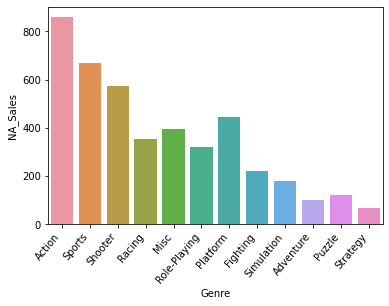

In [13]:
# 지역별로 시각화

## NA Sales
nag = sns.barplot(data=groupsum, x='Genre', y='NA_Sales')
nag.set_xticklabels(nag.get_xticklabels(), rotation = 50, ha = 'right');

북미 지역에서는 다음과 같은 순서로 각 장르들이 출고량이 많았다.
1. Action
2. Sports
3. Shooter
4. Platform

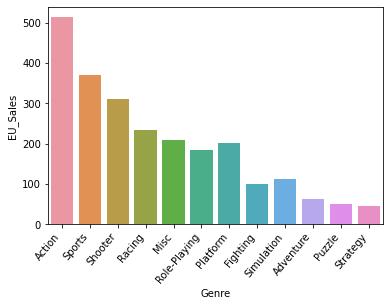

In [14]:
## EU Sales
eug = sns.barplot(data=groupsum, x='Genre', y='EU_Sales')
eug.set_xticklabels(eug.get_xticklabels(), rotation = 50, ha = 'right');

유럽 지역에서는 다음과 같은 순서로 각 장르들이 출고량이 많았다.
1. Action
2. Sports
3. Shooter
4. Racing

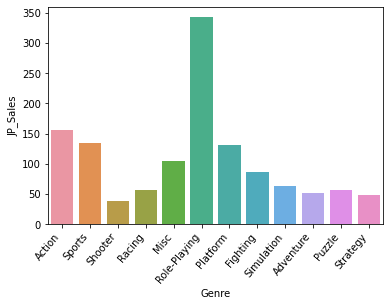

In [15]:
## JP Sales
jpg = sns.barplot(data=groupsum, x='Genre', y='JP_Sales')
jpg.set_xticklabels(jpg.get_xticklabels(), rotation = 50, ha = 'right');

일본 지역에서는 다음과 같은 순서로 각 장르들이 출고량이 많았다.
1. Role-Playing
2. Action
3. Sports
4. Platform

-> 일본에서는 압도적으로 Role-Playing 게임을 선호하는 것을 볼 수 있다.

-> 타 지역과는 다르게 Shooter 나 Racing 게임들에 대한 선호도가 낮음도 볼 수 있다.

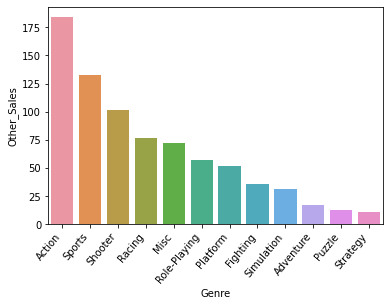

In [16]:
## Other Sales
otg = sns.barplot(data=groupsum, x='Genre', y='Other_Sales')
otg.set_xticklabels(otg.get_xticklabels(), rotation = 50, ha = 'right');

전반적으로 타 지역에서도 Action 게임의 선호도가 높고, Sports, Shooter가 그 뒤를 따른다.

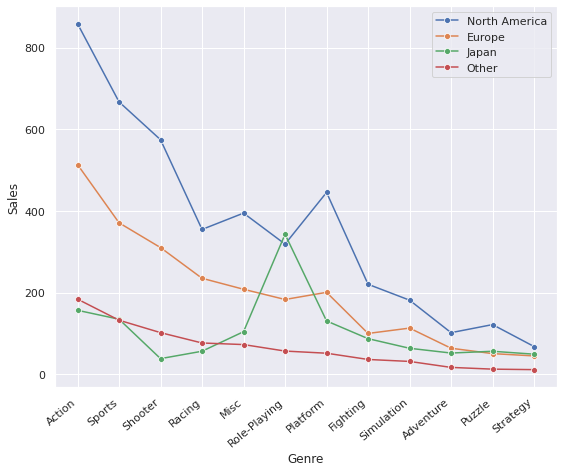

In [53]:
# 한번에 다 표현하기
sns.set_theme()
plt.figure(figsize=(9,7))

gln = sns.lineplot(data=groupsum, x='Genre', y='NA_Sales', marker='o', label = 'North America')
gle = sns.lineplot(data=groupsum, x='Genre', y='EU_Sales', marker='o', label = 'Europe')
glj = sns.lineplot(data=groupsum, x='Genre', y='JP_Sales', marker='o', label = 'Japan')
glo = sns.lineplot(data=groupsum, x='Genre', y='Other_Sales', marker='o', label = 'Other')

glo.set_xticklabels(otg.get_xticklabels(), rotation = 40, ha = 'right');
glo.set(ylabel = 'Sales');

---
## 2. 연도별 게임 트렌드

주어진 데이터 내에서 '트렌드'를 판별하기 위해
- 연도별 출시된 장르 횟수 : ㅁ 장르가 출시가 많이 된 것으로 보아 트렌드였다..?

- 연도별 출시된 플랫폼 횟수: 
- 연도별 어느 나라에서 출고량이 높았는지

In [18]:
yearcnt = df[['Year', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
yearcnt = yearcnt.groupby(['Year', 'Genre']).count()
yearcnt.reset_index(inplace=True)

yearcnt

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1980,Action,1,1,1,1
1,1980,Fighting,1,1,1,1
2,1980,Misc,4,4,4,4
3,1980,Shooter,2,2,2,2
4,1981,Action,25,25,25,25
...,...,...,...,...,...,...
383,2016,Sports,38,38,38,38
384,2016,Strategy,10,10,10,10
385,2017,Action,1,1,1,1
386,2017,Role-Playing,2,2,2,2


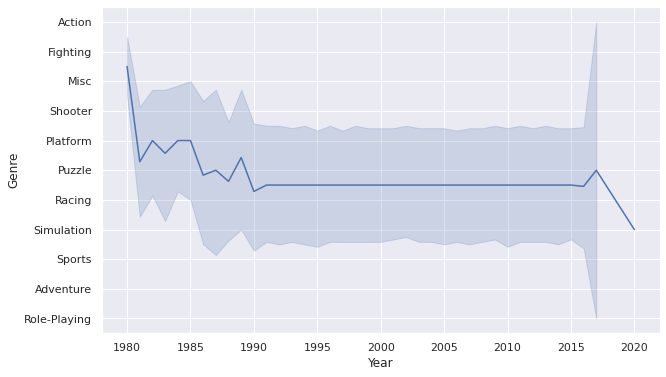

In [19]:
#연도, 장르 - 해당 연도에 A 장르가 제작이 많이 되었다.

gen_df = df[['Year', 'Genre']]
gen_df.head()

sns.set_theme()
plt.figure(figsize=(10,6))
gb = sns.lineplot(data=yearcnt, x = 'Year', y = 'Genre')
gb;

## 장르는 연도별로 트렌드를 타지 않음을 볼 수 있다.

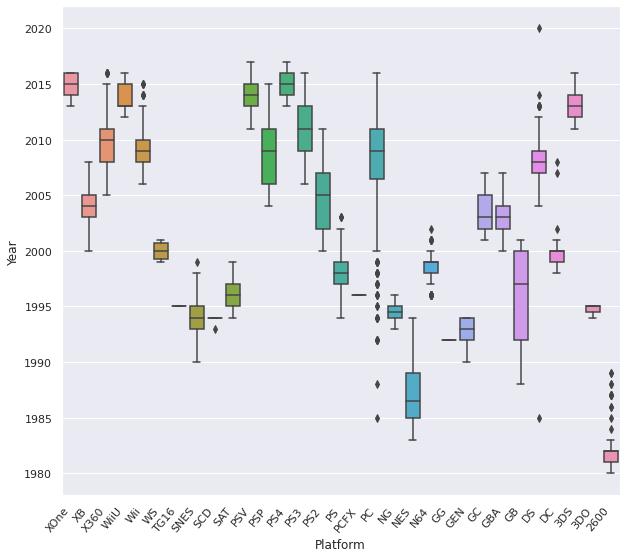

In [20]:
#연도, 플랫폼 - 해당 연도에 A 플랫폼이 제작이 많이 되었다.

plat_df = df[['Year', 'Platform']]
plat_df.head()

sns.set_theme()
plt.figure(figsize=(10,9))

plot_order = plat_df.groupby(by=['Platform'])['Year'].median().iloc[::-1].index

pv = sns.boxplot(data=plat_df, x = 'Platform', y = 'Year', order=plot_order)
pv.set_xticklabels(pv.get_xticklabels(), rotation = 50, ha = 'right')
pv;

# 연도별로 두드러진 플랫폼들이 있었음을 볼 수 있다.
#t-test 검증 어떻게 할까..? 
#  -> 하나씩 일일이 다...?? 충분히 할 수는 있지만 방법이 맞는지 의심스럽다.
# 귀무가설 : ...

In [57]:
#연도, na/eu/jp sales - 해당 연도에 어디에서 제일 많은 출고량이 나왔다.
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

yearsum = df[['Year', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']]
yearsum = yearsum.groupby(['Year']).sum()
yearsum.reset_index(inplace=True)

yearsum.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1980,10.13,0.64,0.00,0.11,10.88
1,1981,33.40,1.96,0.00,0.32,35.68
2,1982,26.92,1.65,0.00,0.31,28.88
3,1983,7.76,0.80,8.10,0.14,16.80
4,1984,33.28,2.10,14.27,0.70,50.35


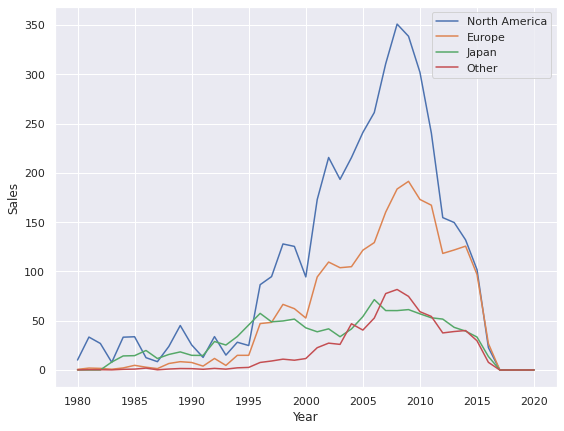

In [58]:
## 연도별 어느 나라에서 출고량이 높았는지
sns.set_theme()
plt.figure(figsize=(9,7))

yln = sns.lineplot(data=yearsum, x='Year', y='NA_Sales', label = 'North America')
yle = sns.lineplot(data=yearsum, x='Year', y='EU_Sales', label = 'Europe')
ylj = sns.lineplot(data=yearsum, x='Year', y='JP_Sales', label = 'Japan')
ylo = sns.lineplot(data=yearsum, x='Year', y='Other_Sales', label = 'Other')

ylo.set(ylabel = 'Sales');

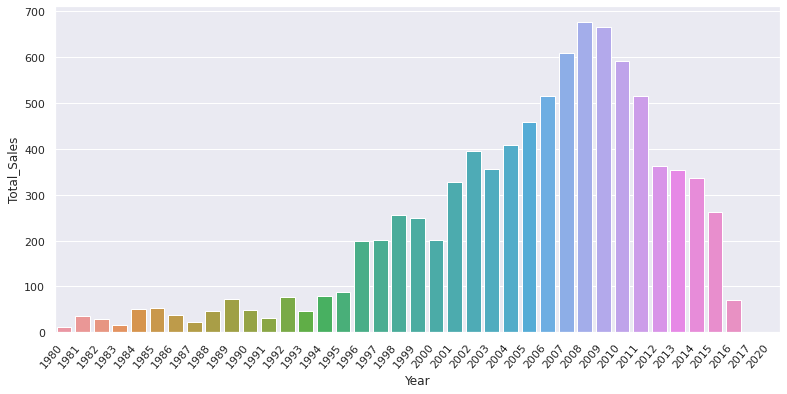

In [62]:
sns.set_theme()
plt.figure(figsize=(13,6))

ybt = sns.barplot(data = yearsum, x = 'Year', y ='Total_Sales');
ybt.set_xticklabels(ybt.get_xticklabels(), rotation = 50, ha = 'right');

In [23]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


---
## 3. 출고량 높은 게임

- 총 출고량 Top 5
- 나라별 출고량 Top 5

In [24]:
## 총 출고량 'Total_Sales' column 생성

df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

## 총 출고량 Top 5

top_sales = df.nlargest(n=5, columns=['Total_Sales'])
top_sales['Percentage'] = (df['Total_Sales'] / df['Total_Sales'].sum()) * 100
top_sales[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Total_Sales', 'Percentage']]

,Name,Platform,Year,Genre,Publisher,Total_Sales,Percentage
2908,Wii Sports,Wii,2006,Sports,Nintendo,82.74,0.945020
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,40.24,0.459604
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.83,0.409235
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,33.00,0.376912
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31.38,0.358409


Table 을 통해 총 출고량이 높은 게임 Top 5 는 다음과 같음을 알 수 있다.
1. Wii Sports
2. Super Mario Bros
3. Mario Kart Wii
4. Wii Sports Resort
5. Pokemon Red/Pokemon Blue

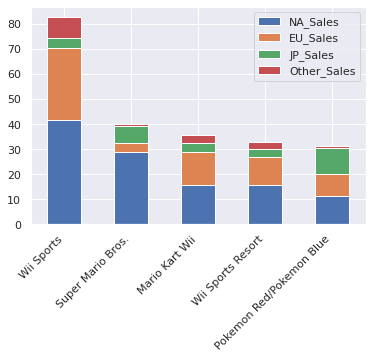

In [25]:
## 시각화

pltts = top_sales[['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
pltts = pltts.copy()
pltts.rename(index = pltts.Name, inplace = True)

ts = pltts.plot(kind='bar', stacked = True);
ts.set_xticklabels(ts.get_xticklabels(), rotation = 45, ha= 'right');


In [26]:
## 북미 지역 출고량 Top 5

df.nlargest(n=5, columns = ['NA_Sales'])


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
10488,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1203,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83


In [27]:
## 유럽 지역 출고량 Top 5

df.nlargest(n=5, columns = ['EU_Sales'])

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
11137,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.75
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39


In [28]:
## 일본 지역 출고량 Top 5

df.nlargest(n=5, columns = ['JP_Sales'])

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
9416,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.09
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
10555,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.35


In [29]:
## 그 외 타 지역 출고량 Top 5

df.nlargest(n=5, columns = ['Other_Sales'])

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
14669,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
14665,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.65
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83


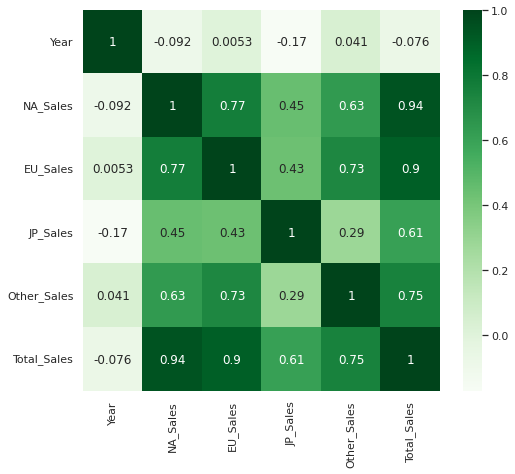

In [30]:
## Correlation

# 일본은 따로 논다는 것을 볼 수 있다.
df.head()

df_num = df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']]

sns.set_theme()
plt.figure(figsize=(8,7))

corr = df_num.corr()
hm = sns.heatmap(corr, annot = True, cmap = 'Greens');
hm.set_yticklabels(hm.get_yticklabels(), rotation = 0, ha= 'right');

- 연도는 출고량과 무관함을 알 수 있다.
- 북미 출고량과 유럽 출고량 그리고 전체 출고량은 높은 상관 관계가 있음을 알 수 있다.
- 일본은 상대적으로 다른 시장들과는 연관성이 낮음을 알 수 있다.

---
4. 전체 게임 시장이 커지고 있나?
